# 4.1 Pandas中的数据结构
Pandas三种数据结构：Series、DataFrame、Panel。分别类似于数组、表格、Excel的多表单sheet
## 4.1.1 Series
一维数组对象，包含值序列和数据标签（索引），通过索引来访问数组中的数据
1. 创建
    1. 通过列表创建
    **例4-1**

In [20]:
import pandas as pd
obj=pd.Series([1, -2, 3, -4])
print(obj)

0    1
1   -2
2    3
3   -4
dtype: int64


输出第一列为index，第二列为数据value。若创建是没有指定index，Pandas会自动创建整型数据（从0开始）作为index，也可以使用Python例索引index和切片slice技术  

**例4-2** 创建时指定索引

In [21]:
i=["a","c","d","a"]
v=[2,4,5,7]
t=pd.Series(v,index=i,name="col")
print(t)

a    2
c    4
d    5
a    7
Name: col, dtype: int64


Pandas有隐藏index位置信息。Series有2个描述数据的手段：位置和标签  
**例4-3** Series位置和标签的使用

In [22]:
val=[2,4,5,6]
idx1=range(10,14)
idx2="hello the cruel world".split()
s0=pd.Series(val)
s1=pd.Series(val, index=idx1)
t=pd.Series(val,index=idx2)
print(s0.index)
print(s1.index)
print(t.index)
print(s0[0])
print(s1[10])
print('default:',t[0],'label:',t["hello"])

RangeIndex(start=0, stop=4, step=1)
RangeIndex(start=10, stop=14, step=1)
Index(['hello', 'the', 'cruel', 'world'], dtype='object')
2
2
default: 2 label: 2


    B. 通过字典创建
    数据被存放在Python字典中
**例4-4** 通过字典创建Series

In [23]:
sdata={"Ohio":35000, "Texas":71000,"Oregon":16000,"Utah":5000}
obj3=pd.Series(sdata)
print(obj3)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


**例4-5** 通过字典创建Series时的索引

In [24]:
sdata={"a":100,"c":300,"b":200}
obj3=pd.Series(sdata)
print(obj3)

a    100
c    300
b    200
dtype: int64


如果键值和指定的索引不匹配，则对应的值是NaN  
**例4-6** 

In [25]:
sdata={"a":100,"b":200,"c":300}
letter={"a","b","e","c"}
obj=pd.Series(sdata,index=letter)
print(obj)

a    100.0
c    300.0
e      NaN
b    200.0
dtype: float64


Series功能：在算术运算符中自动对齐不同索引的数据  
**例4-7** 不同索引数据的自动对齐

In [26]:
sdata={"Ohio":35000,"Texas":71000,"Oregon":16000,"Utah":5000}
obj1=pd.Series(sdata)
states=['California', 'Ohio','Oregon','Texas']
obj2=pd.Series(sdata,index=states)
print(obj1+obj2)

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


Series索引可通过索引赋值的方式修改

**例4-8**

In [27]:
obj=pd.Series([4,7,-3,2])
print(obj)
obj.index=["Bob","Steve","Jeff","Ryan"]
print(obj)

0    4
1    7
2   -3
3    2
dtype: int64
Bob      4
Steve    7
Jeff    -3
Ryan     2
dtype: int64


## 4.1.2 DataFrame
其是一个表格型数据结构，含有有序的列，每列可是不同类型的值。  
既有行索引也有列索引，可被看做有Series组成的**字典（一列是一个键值对）**。 

**DataFrame创建**：直接传入一个等长列表或NumPy数组组成的字典  
**例4-9**

In [28]:
data={'name':['张三','李四','王五','小明'], 'sex':['female','female','male','male'], 'year':[2001,2001,2002,2003], 'city':['北京','上海','广州','云南']}
df=pd.DataFrame(data)
print(df)

  name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2002   广州
3   小明    male  2003   云南


In [29]:
df1=pd.DataFrame(data,columns=['name','year','sex','city'])
print(df1)

  name  year     sex city
0   张三  2001  female   北京
1   李四  2001  female   上海
2   王五  2002    male   广州
3   小明  2003    male   云南


**例4-11** DataFrame创建时的空缺值

In [30]:
df2=pd.DataFrame(data,columns=['name','year','sex','city','address'])
print(df2)

  name  year     sex city address
0   张三  2001  female   北京     NaN
1   李四  2001  female   上海     NaN
2   王五  2002    male   广州     NaN
3   小明  2003    male   云南     NaN


index给出label标签  
**例4-12** 指定行名

In [31]:
df3=pd.DataFrame(data,columns=['name','sex','year','city'])
df3.index=['a','b','c','d']
print(df3)

  name     sex  year city
a   张三  female  2001   北京
b   李四  female  2001   上海
c   王五    male  2002   广州
d   小明    male  2003   云南


## 4.1.3 索引对象
Pandas的索引对象负责管理轴标签和其他元数据（例：轴名称）。  
构建Series和DataFrame时，所有数组或序列的标签都会被转换成Index  
**例4-13** 显示DataFrame的索引和列

In [32]:
print(df)
print(df.index)
print(df.columns)

  name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2002   广州
3   小明    male  2003   云南
RangeIndex(start=0, stop=4, step=1)
Index(['name', 'sex', 'year', 'city'], dtype='object')


**例4-14** DataFrame的Index

In [33]:
print('name' in df.columns)
print('a' in df.index)

True
False


Index的常用方法和属性

|方法|属性|
|:--:|:--:|
|append|连接另一个Index队形，产生一个新的Index|
|diff|计算差集，得到一个Index|
|intersection|交集|
|union|并集|
|isin|计算指定各值是否都包含在参数集合中的布尔数组|
|delect|删除索引i处的元素，并得到引得Index|
|drop|删除传入的值，并得到新的Index|
|insert|将元素插入索引i处，并得到新的Index|
|is_monotonic|当各元素均大于或等于前一个元素时，返回True|
|is.unique|当索引没有重复值时，返回True|
|unique|计算Index中唯一值的数组|

**例4-15** 插入索引值

In [34]:
df.index.insert(1,'w')

Index([0, 'w', 1, 2, 3], dtype='object')

## 4.1.4 查看DataFrame的常用属性
基本属性：value、index、columns、dtypes、ndim、shape  
分别的作用：获得元素、索引、列名、类型、维度、形状  
**例4-16** 查看DataFrame属性

In [35]:
print(df)
print('信息表的所有值：\n',df.values)
print('信息表的所有列：\n',df.columns)
print('信息表的元素个数：\n',df.size)
print('信息表的维度：\n',df.ndim)
print('信息表的形状：\n',df.shape)

  name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2002   广州
3   小明    male  2003   云南
信息表的所有值：
 [['张三' 'female' 2001 '北京']
 ['李四' 'female' 2001 '上海']
 ['王五' 'male' 2002 '广州']
 ['小明' 'male' 2003 '云南']]
信息表的所有列：
 Index(['name', 'sex', 'year', 'city'], dtype='object')
信息表的元素个数：
 16
信息表的维度：
 2
信息表的形状：
 (4, 4)


# 4.2 Pandas索引
## 4.2.1 重建索引
是指对索引重新排序。若某个索引不存在的话，会引入缺失值  
**例4-17** 

In [36]:
obj=pd.Series([2,4,1,5], index=['b','a','d','c'])
print(obj)
obj.reindex(['a','b','c','d','e'])

b    2
a    4
d    1
c    5
dtype: int64


a    4.0
b    2.0
c    5.0
d    1.0
e    NaN
dtype: float64

重建索引时引入的缺失值，用fill_value来填充  
**例4-18**

In [37]:
obj.reindex(['a','b','c','d','e'],fill_value=0)

a    4
b    2
c    5
d    1
e    0
dtype: int64

对于**顺序数据**，如时间序列，重建索引时需要**插值或填值处理**。 

参数method可设置：  
   - method='ffill'或'pad'，表示前向值填充  
   - method='bfill'或'backfill'，表示后向值填充  
   
**例4-19** 缺值的前向填充

In [38]:
import numpy as np
obj1=pd.Series(['blue','red','black'], index=[0,2,4])
obj1.reindex(np.arange(6),method='ffill')

0     blue
1     blue
2      red
3      red
4    black
5    black
dtype: object

**例4-20** 缺失值的后向填充

In [39]:
obj1=pd.Series(['blue','red','black'], index=[0,2,4])
obj1.reindex(np.arange(6),method='backfill')

0     blue
1      red
2      red
3    black
4    black
5      NaN
dtype: object

若仅传入一个序列，默认是对行索引进行操作  
**例4-21** 修改索引（行和列）

In [40]:
df4=pd.DataFrame(np.arange(9).reshape(3,3), index=['a','c','d'], columns=['one','two','four'])
print(df4)

   one  two  four
a    0    1     2
c    3    4     5
d    6    7     8


reindex的参数及其说明

|参数|说明|
|:--:|:--:|
|index|用于索引的新序列|
|method|填充的方式
|fill_value|缺失值的替换值
|limit|最大填充值
|leve copy|在Multiindex的指定级别上匹配简单索引，否则选取其子集默认为True；若为False，则新旧相等时不复制

**例4-22** reindex操作

In [41]:
df4.reindex(index=['a','b','c','d'], columns=['one','two','three','four'])

,one,two,three,four
a,0.0,1.0,NaN,2.0
b,NaN,NaN,NaN,NaN
c,3.0,4.0,NaN,5.0
d,6.0,7.0,NaN,8.0


**例4-23** 传入fill_value=n来填充缺损值

In [42]:
df4.reindex(index=['a','b','c','d'],columns=['one','two','three','four'],fill_value=100)

,one,two,three,four
a,0,1,100,2
b,100,100,100,100
c,3,4,100,5
d,6,7,100,8


## 4.2.2 更换索引
在创建结构时，通过index来设置个性化行索引。  
若想将列数据作为索引，使用set_index方法来实现。  
和set_index方法相反的方法是reset_index方法。  
**例4-22** 更换索引

In [43]:
df5=df1.set_index('city')
print(df5)

     name  year     sex
city                   
北京     张三  2001  female
上海     李四  2001  female
广州     王五  2002    male
云南     小明  2003    male


# 4.3 DataFrame数据的查询与编辑
## 4.3.1 DataFrame数据的查询
1. 选取列
通过**列索引标签或以属性**的方式单独获取DataFrame的列数据，返回数据为Series类型  
**例4-25** 选取列数据

In [44]:
w1=df['name']
print('选取1列数据：\n',w1)
w2=df[['name','year']]
print('选取2列数据：\n',w2)

选取1列数据：
 0    张三
1    李四
2    王五
3    小明
Name: name, dtype: object
选取2列数据：
   name  year
0   张三  2001
1   李四  2001
2   王五  2002
3   小明  2003


2. 选取行  
通过行索引或行索引位置的切片形式选取行数据  
**例4-26** 选取行数据

In [45]:
print(df)
print('显示前2行：\n',df[:2])
print('显示2~3两行：\n',df[1:3])

  name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2002   广州
3   小明    male  2003   云南
显示前2行：
   name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
显示2~3两行：
   name     sex  year city
1   李四  female  2001   上海
2   王五    male  2002   广州


3. 选取行和列
切片选取行有局限。Pandas提供两种方法实现：  
- DataFrame.loc(行索引名称或条件，列索引名称)
- DataFrame.iloc(行索引的位置，列索引的位置)

**例4-27** loc选行和列

In [46]:
print(df5.loc[:,['name','year']])  # 显示name和year两列
print(df5.loc[['北京','上海'],['name','year']])  # 显示北京和上海中的name和year两列

     name  year
city           
北京     张三  2001
上海     李四  2001
广州     王五  2002
云南     小明  2003
     name  year
city           
北京     张三  2001
上海     李四  2001


**例4-28** iloc选行和列

In [47]:
print(df5.iloc[:,2])  # 前2列
print(df5.iloc[[1,3]])  # 第1、3行
print(df5.iloc[[1,3],[1,2]])

city
北京    female
上海    female
广州      male
云南      male
Name: sex, dtype: object
     name  year     sex
city                   
上海     李四  2001  female
云南     小明  2003    male
      year     sex
city              
上海    2001  female
云南    2003    male


ix方法支持索引标签、索引位置来进行行列选取  
**例4-29** ix选取行和列

In [48]:
import pandas
print(pandas.__version__)
#print('显示前2行：\n',df5.ix[1:3,['name','year']])
#ix在pandas1.0.0以上的版本中被删除了

1.1.4


4. 布尔选择  
对DataFrame中的数据进行布尔选择，布尔运算符有：!=不等于、&与、|或   
**例4-30** 

In [49]:
df5[df5['year'] == 2001]

,name,year,sex
city,,,
北京,张三,2001,female
上海,李四,2001,female


## 4.3.2 DataFrame数据的编辑  
将需要编辑的数据提取出来，重新赋值  
1. 增加数据  
增加行：append方法，用字典结构数据增加一行  
**例4-31** 增加一行数据

In [50]:
data1={'city':'兰州','name':'李红','year':2005,'sex':'female'}
df.append(data1,ignore_index=True)

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2002,广州
3,小明,male,2003,云南
4,李红,female,2005,兰州


增加列：直接为要增加的列赋值即可  
**例4-32**

In [51]:
df5['age']=20
df5['C']=[85,78,96,80]
print(df5)

     name  year     sex  age   C
city                            
北京     张三  2001  female   20  85
上海     李四  2001  female   20  78
广州     王五  2002    male   20  96
云南     小明  2003    male   20  80


##### 2. 删除数据  
用drop方法，通过axis参数确定删除的是行还是列。  
默认数据删除不修改原数据。若要在原数据上删除，需设置inplace=True  
**例4-33** 删除数据的行

In [52]:
print(df5.drop('广州'))

     name  year     sex  age   C
city                            
北京     张三  2001  female   20  85
上海     李四  2001  female   20  78
云南     小明  2003    male   20  80


**例4-34** 删除数据的列

In [53]:
df5.drop('age',axis=1,inplace=True)
print(df5)

     name  year     sex   C
city                       
北京     张三  2001  female  85
上海     李四  2001  female  78
广州     王五  2002    male  96
云南     小明  2003    male  80


3. 修改数据  
丢选择的数据赋值，即可修改数据。数据修改是直接对DataFrame数据修改，操作无法撤销。  

# 4.4 Pandas数据运算  
## 4.4.1 算术运算  
算术运算时，若有相同索引则进行算术运算；没有相同的索引则进行数据对齐，且引入缺失值。  
**例4-35** Series相加

In [54]:
obj1=pd.Series([5,2,6,9],index=['a','c','g','f'])
print("obj1:\n",obj1)
obj2=pd.Series([3,7,1,8],index=['a','b','g','h'])
print("obj2:\n",obj2)
print(obj1+obj2)

obj1:
 a    5
c    2
g    6
f    9
dtype: int64
obj2:
 a    3
b    7
g    1
h    8
dtype: int64
a    8.0
b    NaN
c    NaN
f    NaN
g    7.0
h    NaN
dtype: float64


对DataFrame，数据对齐会发生在行和列上  
**例4-36** DataFrame数据相加

In [55]:
a=np.arange(6).reshape(2,3)
b=np.arange(4).reshape(2,2)
df1=pd.DataFrame(a,columns=['a','b','e'],index=['A','C'])
print("df1:\n",df1)
df2=pd.DataFrame(b,columns=['a','b'],index=['A','D'])
print("df2:\n",df2)
print("df1+df2:\n",df1+df2)

df1:
    a  b  e
A  0  1  2
C  3  4  5
df2:
    a  b
A  0  1
D  2  3
df1+df2:
      a    b   e
A  0.0  2.0 NaN
C  NaN  NaN NaN
D  NaN  NaN NaN


## 4.4.2 函数应用和映射  
3中方法实现定义函数：
- map函数：将函数套用到Series的每个元素
- apply函数：函数套用到DataFrame的行和列上，通过axis设置行或列
- appmap函数：函数套用到DataFrame的每个人元素  

**例4-37** 将水果价格表中的“元”去掉

In [56]:
data={'fruit':['apple','grape','banana'],'price':['30元','43元','28元']}
df1=pd.DataFrame(data)
print(df1)
def f(x):
    return x.split('元')[0]
df1['price']=df1['price'].map(f)
print("修改后的数据表：\n",df1)

    fruit price
0   apple   30元
1   grape   43元
2  banana   28元
修改后的数据表：
     fruit price
0   apple    30
1   grape    43
2  banana    28


**例4-38** apply函数的使用方法

In [57]:
df2=pd.DataFrame(np.random.randn(3,3),columns=['a','b','c'],index=['app','win','mac'])
print(df2)
print(df2.apply(np.mean))
print(df2.apply(np.mean,axis=1))

            a         b         c
app -1.125510 -0.288895  0.844104
win  0.209888 -0.546811 -0.053094
mac  0.350399 -0.557283  1.002302
a   -0.188408
b   -0.464329
c    0.597771
dtype: float64
app   -0.190100
win   -0.130006
mac    0.265139
dtype: float64


**例4-39** applymap函数用法

In [58]:
print(df2)
df2.applymap(lambda x:'%.3f'%x)

            a         b         c
app -1.125510 -0.288895  0.844104
win  0.209888 -0.546811 -0.053094
mac  0.350399 -0.557283  1.002302


,a,b,c
app,-1.126,-0.289,0.844
win,0.210,-0.547,-0.053
mac,0.350,-0.557,1.002


## 4.4.3 排序
在Series中，用sort_index方法对索引进行排序，默认为升序。  
用sort_values方法Udine数值进行排序。  
**例4-40** 对索引进行排序

In [59]:
wy=pd.Series([1,-2,4,-4],index=['c','b','a','d'])
print(wy)
print('排序后的Series：\n',wy.sort_index())

c    1
b   -2
a    4
d   -4
dtype: int64
排序后的Series：
 a    4
b   -2
c    1
d   -4
dtype: int64


**例4-41** 对数值排序

In [60]:
print('值排序后的Series：\n',wy.sort_values())

值排序后的Series：
 d   -4
b   -2
c    1
a    4
dtype: int64


对DataFrame数据排序是，需要制定轴的方向，用sort_index方法对行或列索引进行排序。  
若要列排序，用sort_values方法，并把列名传给by参数  
**例4-42** DataFrame列排序

In [61]:
print(df2)
df2.sort_values(by='a')

            a         b         c
app -1.125510 -0.288895  0.844104
win  0.209888 -0.546811 -0.053094
mac  0.350399 -0.557283  1.002302


,a,b,c
app,-1.125510,-0.288895,0.844104
win,0.209888,-0.546811,-0.053094
mac,0.350399,-0.557283,1.002302


## 4.4.4 汇总与统计
1. 数据汇总  
在DataFrame中，用sum方法对每列进行求和，与Excel的sum函数类似。  
若设置axis指定轴方向，axis=1，实现按行汇总  
**例4-43** DataFrame中的汇总

In [62]:
print('按行汇总：\n',df2.sum())
print('按列汇总：\n',df2.sum(axis=1))

按行汇总：
 a   -0.565224
b   -1.392988
c    1.793312
dtype: float64
按列汇总：
 app   -0.570301
win   -0.390017
mac    0.795418
dtype: float64


2. 数据描述与统计  
概括、表述事物整体情况以及事物间关联、雷叔关系的统计方法。  
通过统计值描述数据的集中趋势和离散程度等分布状态。  
describe方法对每个数值型列进行统计，在对数据初步观察是使用  
**例4-44**示例

In [63]:
df2.describe()

,a,b,c
count,3.000000,3.000000,3.000000
mean,-0.188408,-0.464329,0.597771
std,0.814590,0.152021,0.569188
min,-1.125510,-0.557283,-0.053094
25%,-0.457811,-0.552047,0.395505
50%,0.209888,-0.546811,0.844104
75%,0.280143,-0.417853,0.923203
max,0.350399,-0.288895,1.002302


|方法名称|说明|方法名称|说明|
|:--:|:--:|:--:|:--:|
|min|最小值|max|最大值
|mean|均值|ptp|极差
|median|中位数|std|标准差
|var|方差|cov|协方差
|sem|标准误差|mode|众数
|skew|样本偏度|kurt|样本峰度
|quantile|四分位数|count|非空值数目
|describe|描述统计|mad|平均绝对离差

对于类别性特征的描述性统计，可用频数统计表。  
Pandas库的 unique方法：获得不重复的数组  
value_counts方法：频数统计  
**例4-45** 数据的频数统计  

In [64]:
obj=pd.Series(['a','b','c','a','d','c'])
print(obj.unique())
print(obj.value_counts())

['a' 'b' 'c' 'd']
c    2
a    2
d    1
b    1
dtype: int64


# 4.5 数据分组与聚合
## 4.5.1 数据分组
1. groupby方法  
根据索引或字段对数据进行分组，  
格式：DataFrame.groupby(by=None,axis=0,level=None,as_index=True,sort=True,group_keys=True,squeeze=False)
参数说明：
|参数名称|参数说明|
|:--:|:--:|
|by|传入函数、字典、Series等，用于确定分组的依据
|axis|接受int，表示操作的轴方向，默认为0
|level|接受int或索引名，标签所在的级别，默认为None
|as_index|接受boolean，聚合后的标签是以DataFrame索引输出
|sort|接受Boolean，对分组依据和分组标签排序，默认为True
|group_keys|接受Boolean，是否显示分组标签的名称，默认为True
|squeeze|接受Boolean，是否在允许情况下对返回的数据降维，默认为False

**例4-46** 用法举例


In [65]:
import pandas as pd
import numpy as np
df=pd.DataFrame({'key1':['a','a','b','b','a'], 'key2':['yes','no','yes','yes','no'], 'data1':np.random.randn(5),'data2':np.random.randn(5)})
grouped=df['data1'].groupby(df['key1'])
print(grouped.size())
print(grouped.mean)

key1
a    3
b    2
Name: data1, dtype: int64
<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000002AAF1281FD0>>


In [66]:
df

,key1,key2,data1,data2
0,a,yes,1.366924,-0.487925
1,a,no,1.024363,-0.807596
2,b,yes,0.706305,1.593748
3,b,yes,0.972218,-0.100394
4,a,no,2.199009,2.011306


2. 按列名分组  
DataFrame数据的列索引可以作为分组键  
**例4-47**

In [67]:
groupk1=df.groupby('key2').mean()
groupk1

,data1,data2
key2,,
no,1.611686,0.601855
yes,1.015149,0.335143


3. 按列表或元组分组  
分组键是长度和DataFrame行数相同的列表或元组  
**例4-48**

In [68]:
wlist=['w','w','y','w','y']
df.groupby(wlist).sum()

,data1,data2
w,3.363505,-1.395915
y,2.905314,3.605054


4. 按字典分组  
- 参考：https://blog.csdn.net/qq_32618817/article/details/80587228  


**例4-49** 字典作为分组键，各字母不区分大小写  

In [69]:
df=pd.DataFrame(np.random.normal(size=(6,5)), index=['a','b','c','A','B','C'])
print("数据为：\n",df)
wdict={'a':'one','A':'one','b':'two','c':'three'}
print("分组汇总后的结果为：\n",df.groupby(wdict).sum())

数据为：
           0         1         2         3         4
a  1.276714  2.494325 -1.146669  0.484701  0.436728
b  1.186960 -0.841497 -0.594088  1.100861 -1.258014
c -0.003900 -0.758853  0.058293 -0.507102 -0.364509
A  0.449272 -0.655650  0.489139  1.755240  0.547337
B  0.377679 -0.982650 -0.678516  1.292457 -0.081362
C -2.190826 -0.395029  0.910009 -1.782818 -0.606284
分组汇总后的结果为：
               0         1         2         3         4
one    1.725986  1.838675 -0.657530  2.239941  0.984065
three -0.003900 -0.758853  0.058293 -0.507102 -0.364509
two    1.186960 -0.841497 -0.594088  1.100861 -1.258014


5. 按函数分组  
通过映射关系进行分组  
**例4-50** 最后一列的数值进行正负分组

In [70]:
def judge(x):
    if x>=0:
        return 'a'
    else:
        return 'b'
df=pd.DataFrame(np.random.randn(4,4))
print(df)
print(df[3].groupby(df[3].map(judge)).sum())

          0         1         2         3
0  0.486237  0.511619  0.649384 -0.005072
1  0.403364 -0.086880  1.149864  1.251534
2  0.009745 -0.666845  0.471898 -0.276182
3 -1.895858 -1.448208 -0.797562 -0.189359
3
a    1.251534
b   -0.470612
Name: 3, dtype: float64


## 4.5.2 数据聚合  
对分组后的数据进行计算，产生标量值的数据转换的过程  
1. 聚合函数  
常用的有：count、sum、mean、median、std（无偏标准差）、var（无偏方差）、min、max、prod（求积）、first（第一个值）、last（最后一个值）  
可以自定义聚合运算，使用时，将其传入aggregate或agg方法即可  
2. 使用agg方法的聚合数据  
agg、aggregate方法都可对每个分组应用某个函数  
示例的数据如下：

In [71]:
dt={
    '序号':[i for i in range(1,6)],
    '性别':['女', '女', '男', '男', '男'],
    '身份证号':[1982080000, 1984110000, 1983060000, 1985040000, 1986040000],
    '是否吸烟':['否', '否', '否', '否', '否'],
    '是否饮酒':['否', '否', '否', '否', '否'],
    '开始从事某项工作年份':[2009, 2015, 2013, 2014, 2014],
    '体检年份':[2017, 2017, 2017, 2017, 2017],
    '淋巴细胞计数':[2.4, 1.8, 2.0, 2.5, 1.3],
    '白细胞计数':[8.5, 5.8, 5.6, 6.6, 5.2],
    '细胞其他值':[0, 0, 0, 0, 0],
    '血小板计数':[248.0, 300.0, 195.0, 252.0, 169.0]
}
data=pd.DataFrame(dt)
print(data)

   序号 性别        身份证号 是否吸烟 是否饮酒  开始从事某项工作年份  体检年份  淋巴细胞计数  白细胞计数  细胞其他值  血小板计数
0   1  女  1982080000    否    否        2009  2017     2.4    8.5      0  248.0
1   2  女  1984110000    否    否        2015  2017     1.8    5.8      0  300.0
2   3  男  1983060000    否    否        2013  2017     2.0    5.6      0  195.0
3   4  男  1985040000    否    否        2014  2017     2.5    6.6      0  252.0
4   5  男  1986040000    否    否        2014  2017     1.3    5.2      0  169.0


 1. 计算当前数据中的各项统计量  
 **例4-51** 用agg求出当前数据对应的统计量

In [72]:
data[['淋巴细胞计数','白细胞计数']].agg([np.sum, np.mean])

,淋巴细胞计数,白细胞计数
sum,10.0,31.70
mean,2.0,6.34


2. 计算各字段的不同统计量  
**例4-52** 

In [73]:
data.agg({'淋巴细胞计数':np.mean,'血小板计数':np.std})

淋巴细胞计数     2.000000
血小板计数     51.514076
dtype: float64

3. 计算不同字段的不同数目的统计量  
**例4-53**

In [74]:
data.agg({'淋巴细胞计数':np.mean,'血小板计数':[np.mean, np.std]})

,淋巴细胞计数,血小板计数
mean,2.0,232.800000
std,NaN,51.514076


分组后的数据也可使用聚合统计方法  
**例4-54** 统计不同性别人群的血小板计数

In [75]:
data.groupby('性别')['血小板计数'].agg(np.mean)

性别
女    274.000000
男    205.333333
Name: 血小板计数, dtype: float64

若想返回的结果不以分组键为索引，可通过as_index=False实现  
**例4-55**

In [76]:
data.groupby(['性别'],as_index=False)['血小板计数'].agg(np.mean)

,性别,血小板计数
0,女,274.000000
1,男,205.333333


## 4.5.3 分组运算  
分组运算包括聚合运算  
1. transform方法：  
将运算分布到每一行  
**例4-56**

In [77]:
data.groupby(['性别','是否吸烟'])['血小板计数'].transform('mean').sample(5)

0    274.000000
4    205.333333
3    205.333333
1    274.000000
2    205.333333
Name: 血小板计数, dtype: float64

2. apply方法  
类似于agg方法，将函数应用于每一列  
返回结果不以分组键为索引，设置groupby_keys=False
**例4-57** 分组后应用apply统计

In [78]:
data.groupby(['性别','是否吸烟'])['血小板计数'].apply(np.mean)

性别  是否吸烟
女   否       274.000000
男   否       205.333333
Name: 血小板计数, dtype: float64

apply和agg方法的不同：  
agg能够对不同字段应用不同函数，但apply不行  
# 4.6 数据透视表  
根据一个或多个键值对数据进行聚合，根据列或行的分组键将数据划分到各个区域  
## 4.6.1 透视表  
pivot_table函数也可对数据分组聚合实现透视功能，格式如下：  
pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='ALL')  
参数说明：  

|参数|使用说明|
|:--:|:--:|
|data|接收DataFrame，表示创建表的数据|
|values|接收string，指定要聚合的字段，默认为全部数据
|index|接收string或list，行分组键
|columns|接收string或list，列分组键
|aggfunc|接收function，聚合函数，默认为mean
|margins|接收boolean，汇总功能的开关
|dropna|接收boolean，是否删除全为Nan的列，默认为False

**例4-58**

In [79]:
data=pd.DataFrame({'k1':['a','b','a','a','c','c','b','a','c','a','b','c'], 'k2':['one','two','three','two','one','one','three','one','two','three','one','two'], 'w':np.random.rand(12),'y':np.random.randn(12)})
print(data)
data.pivot_table(index='k1',columns='k2')

   k1     k2         w         y
0   a    one  0.790676 -0.345016
1   b    two  0.840973  0.206448
2   a  three  0.435189 -0.991915
3   a    two  0.232716 -1.414217
4   c    one  0.836065 -1.312200
5   c    one  0.036841  0.232112
6   b  three  0.382366  0.231117
7   a    one  0.020960  0.037339
8   c    two  0.038886  0.792953
9   a  three  0.757274 -2.153604
10  b    one  0.405393  0.392260
11  c    two  0.911750  0.395759


w                             y                    
k2       one     three       two       one     three       two
k1                                                            
a   0.405818  0.596232  0.232716 -0.153838 -1.572759 -1.414217
b   0.405393  0.382366  0.840973  0.392260  0.231117  0.206448
c   0.436453       NaN  0.475318 -0.540044       NaN  0.594356

**例4-59** 分类汇总并求和

In [80]:
data.pivot_table(index='k1',columns='k2',aggfunc='sum')

w                             y                    
k2       one     three       two       one     three       two
k1                                                            
a   0.811636  1.192463  0.232716 -0.307677 -3.145519 -1.414217
b   0.405393  0.382366  0.840973  0.392260  0.231117  0.206448
c   0.872905       NaN  0.950637 -1.080088       NaN  1.188712

## 4.6.2 交叉表  
主要用于计算分组频率。  
Pandas的crosstab函数可以制作，其格式如下：
crosstab(index, columns, values=None, rownames=None, colname=None, aggfunc=None, margins=False, dropna=True, normalize=False)  
参数及其说明如下：  

|参数|使用说明|
|:--:|:--:|
|index|接收string或list，表示行索引键，无默认值
|columns|接收string或list，列索引键
|values|接收array，聚合数据，默认为None
|rownames|行分组键名，无默认
|colname|列分组键名，无默认
|aggfunc|接收functions,聚合函数，默认为None
|margins|接收boolean，汇总功能的开关
|dropna|接收boolean，是否删除全为Nan的列，默认为False
|normalize|接收boolean，是否对值进行标准化，默认为False

**例4-60** 交叉表示例

In [81]:
pd.crosstab(data.k1,data.k2)

k2,one,three,two
k1,,,
a,2,2,1
b,1,1,1
c,2,0,2


在边框处增加汇总项，指定margins=True  
**例4-61**

In [82]:
pd.crosstab(data.k1, data.k2, margins=True)

k2,one,three,two,All
k1,,,,
a,2,2,1,5
b,1,1,1,3
c,2,0,2,4
All,5,3,4,12


# 4.7 Pandas可视化  
## 4.7.1 线形图  
线形图描绘数据之间的趋势，plot方法默认是绘制线形图  
**例4-62** Series的plot

<AxesSubplot:>

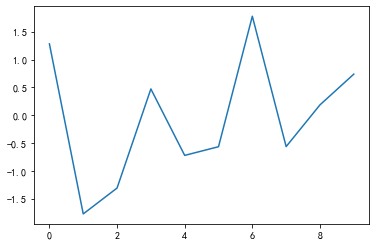

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
s=pd.Series(np.random.normal(size=10))
s.plot()

**例4-63** DataFrame的plot

<AxesSubplot:>

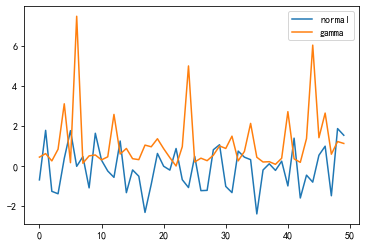

In [84]:
df=pd.DataFrame({'normal':np.random.normal(size=50), 'gamma':np.random.gamma(1,size=50)})
df.plot()

## 4.7.2 柱状图  
描述各类别之间的关系。在plot函数中加参数kind='bar'，类别多的可使用水平柱状图kind='barh'  
**例4-64**

female    3
male      2
Name: sex, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


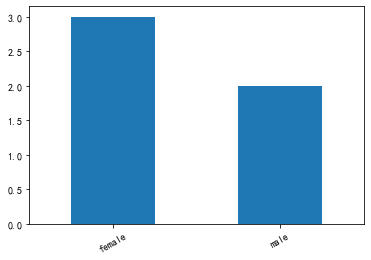

In [85]:
stu={'name':['小明','小王','小李','小赵','小张'], 'sex':['male','female','female','female','male'], 'year':[1996,1997,1994,1999,1996]}
data=pd.DataFrame(stu)
print(data['sex'].value_counts())
print(data['sex'].value_counts().plot(kind='bar',rot=30))

**例4-65**

       11  12  13
two    31  54  83
three  69  83  87
one    16  15  55


<AxesSubplot:>

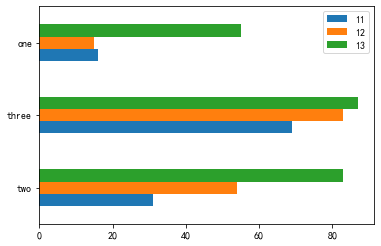

In [86]:
df=pd.DataFrame(np.random.randint(1,100,size=(3,3)), index={'one','two','three'}, columns=['11','12','13'])
print(df)
df.plot(kind='barh')

## 4.7.3 直方图  
用于频率分布，可以观察数据值的大致分布规律，通过hist方法绘制  
核密度估计，plot参数kind='kde'即可  
**例4-66**  直方图

0    -0.211241
1    -1.459845
2     0.300013
3     0.279334
4     1.525947
        ...   
75   -0.174107
76    0.201062
77    0.737285
78   -0.647939
79    0.729320
Length: 80, dtype: float64


<AxesSubplot:>

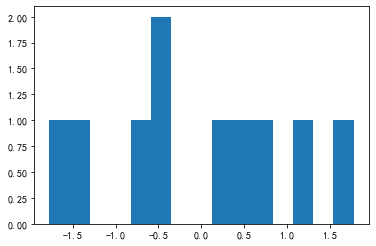

In [87]:
wy=pd.Series(np.random.normal(size=80))
print(wy)
s.hist(bins=15,grid=False)

**例4-67** 核密度图

<AxesSubplot:ylabel='Density'>

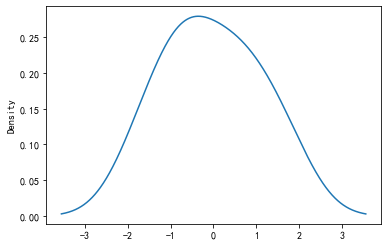

In [88]:
wy=pd.Series(np.random.normal(size=80))
s.plot(kind='kde')

## 4.7.4 散点图  
表现数据之间的规律  
**例4-68** 绘制散点图

<AxesSubplot:xlabel='A', ylabel='B'>

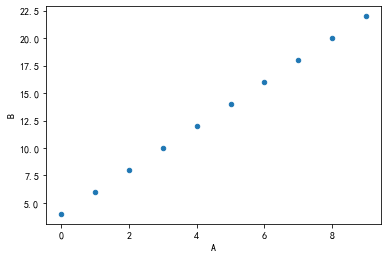

In [89]:
wd=pd.DataFrame(np.arange(10), columns=['A'])
wd['B']=2*wd['A']+4
wd.plot(kind='scatter', x='A',y='B')

# 4.8 本章小结  
主要介绍了Pandas的统计分析基础，包括：Pandas数据结构、索引操作、数据运算、数据分组与聚合、透视表、绘图  
## 实训
对小费数据集进行数据分析与可视化。数据集来源于Python库Seaborn中自带的数据，以事先被转存为Excel类型  
### 1.导入模块

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文标签
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

### 2.获取数据

In [91]:
#导入待处理数据tips.xls
fdata=pd.read_excel(r'D:\\My_Project\DataSet\Python数据分析\tips.xls')
fdata.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 3.分析数据

In [92]:
#1.查看数据的描述信息
fdata.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [93]:
#2.修改列名为汉字，并显示前5行
fdata.rename(columns={'total_bill':'消费金额','tip':'小费','sex':'性别','smoker':'是否抽烟','day':'星期','time':'聚餐时间段','size':'人数'}, inplace=True)
fdata.head()

,消费金额,小费,性别,是否抽烟,星期,聚餐时间段,人数
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='消费金额', ylabel='小费'>

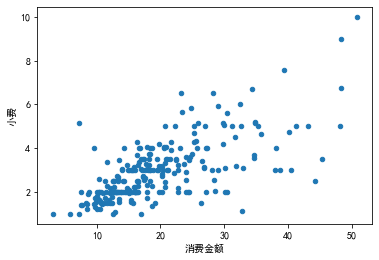

In [94]:
#3.分析消费金额和总金额的关系
fdata.plot(kind='scatter',x='消费金额',y='小费')

In [95]:
#4.分析男性顾客与女性顾客谁更慷慨
fdata.groupby('性别')['小费'].mean()

性别
Female    2.833448
Male      3.089618
Name: 小费, dtype: float64

['Sun' 'Sat' 'Thur' 'Fri']


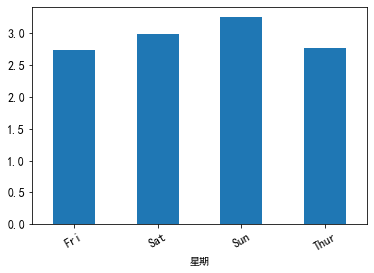

In [96]:
#5.分析日期和小费的关系
print(fdata['星期'].unique())
r=fdata.groupby('星期')['小费'].mean()
fig=r.plot(kind='bar',x='星期',y='小费',fontsize=12, rot=30)
fig.axes.title.set_size(16)

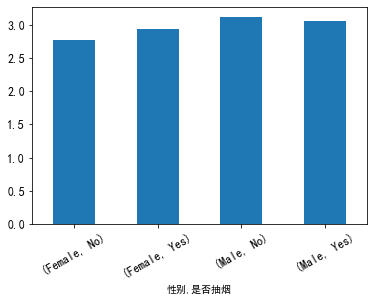

In [97]:
#6.性别和抽烟的组合对慷慨度的影响
r=fdata.groupby(['性别','是否抽烟'])['小费'].mean()
fig=r.plot(kind='bar',x='星期',y='小费',fontsize=12,rot=30)
fig.axes.title.set_size(16)

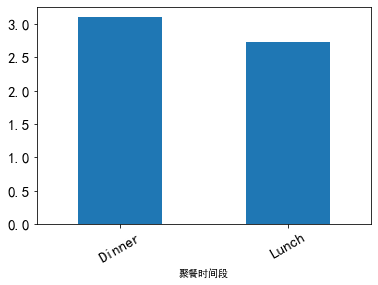

In [98]:
#7.分析聚餐时间段与小费数额的关系
r=fdata.groupby(['聚餐时间段'])['小费'].mean()
fig=r.plot(kind='bar',x='星期',y='小费',fontsize=15,rot=30)
fig.axes.title.set_size(16)